### COVID-19 Quick Start Notebook  
- If this is your first time using the IBM Functional Genomics Platform SDK, please see our [installation documentation](https://ibm.github.io/omxware-pypi-docs/build/html/installation.html) and [Getting Started Notebook](https://github.com/IBM/omxware-getting-started/blob/master/GettingStarted.ipynb) or [Getting Started Documentation](https://ibm.github.io/omxware-pypi-docs/build/html/usage.html). 
- If you have any questions, please feel free to reach out to us via our forums http://ibm.biz/functional-genomics-forum.

**Verify Python 3**

In [18]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


**Install or Update the OMXWare Package (if needed)**

In [19]:
# !echo 'y' | pip uninstall omxware

# #Install OMXWare client
# !pip install --no-cache-dir omxware

# #Install PrettyPrint
# !pip install --no-cache-dir pprint

# #Install py4j to use Dynamic forms
# !pip install --no-cache-dir py4j

# #Install panda
# !pip install --no-cache-dir pandas

In [20]:
!pip show omxware

Name: omxware
Version: 0.1.37
Summary: IBM Functional Genomics Platform SDK to explore data.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: IBM
Location: /Users/kristenbeck/miniconda3/lib/python3.7/site-packages
Requires: simplejson, IPython, urllib3, pprint, requests, python-keycloak, matplotlib, pycrypto, pandas, configparser
Required-by: 


**Import OMXWare and initialize**

In [21]:
%matplotlib inline

import json
import pprint
import math
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware

# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
# token = omxware.get_token('username', 'password') # fill in password to initiate token

# or

# use previously generated token loaded from file
token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
f = open(token_path)
token = f.readline()


# provide your token to authenticate
omx = omxware.omxware(token)


**Access OMXWare Help**

In [22]:
help(omx)

Help on omxware in module omxware.omxware object:

class omxware(builtins.object)
 |  omxware(omxware_token, env='public')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, omxware_token, env='public')
 |      Initialize a session.
 |      
 |      Parameters:
 |          :param omxware_token: OMXWare Token. use
 |          :type omxware_token: str
 |      
 |          :param env: OMXWare `env` type. Must be one of ['master', 'dev', 'dev_search', 'local']
 |          :type env: str
 |  
 |  domains(self, ids=None, sequence=None, genus_names=None, protein_ids=None, go_terms=None, ipr_ids=None, sequence_length=None, classification=None, collection=None, page_size=25, page_number=1)
 |      Get OMXWare Domains.
 |      
 |      Parameters:
 |      
 |          :param ids: List of domain ids
 |          :type ids: [str]
 |      
 |          :param sequence: Domain sequence
 |          :type sequence: str
 |      
 |          :param genus_names: List of Genus names
 |          :type ge

**Search for Details About a Specific Gene Sequence**  
- Since the IBM Functional Genomics Platform has pre-computed millions of genes, proteins, etc. and stored all of the unique sequences, we can access the data with a simple retrieval to see if a sequence already exists. If that sequence exists, you can then just connect out to other related biological entities e.g. query a gene then find the relevant domains for its protein sequences.  
- If you're interested in a fuzzy search, this can be accomplished by retrieving sequences of interest and using your aligner/classifier of choice. Those sequences of interest can be retrieved as a dataframe, JSON, or FASTA format.
- Alternatively, you can complete a fuzzy search using our [BLAST application](http://ibm.biz/functional-genomics-blast)

In [23]:
search_term = "ATGATCGAGATACAACACCTTAACCTGACGTTTGGCGAGGGCGAGAAGCGTAATCAGGTGCTGGACGATGTGAATATCAGCGTGAGGGAGGGGGAGATTTACGGCCTGGTGGGGGAGTCCGGTTCGGGCAAAACCACGGTGCTGAAATGCCTTGCCGGGCTGTTTACCCACTGGGAGGGCGAGCTGGCGATTAACGGCAAGCGGCTGGAAAAACGTATCAGCCAGGAACGCTGCCGCCGGGTGCAGATGGTATTTCAGGATCCGTACGGCTCTTTGCATCCGCGTCACACCATCGGCGATATTCTGGAAGAGCCGCTGCACATTCACCGCATAAAAGATCGGGAGCGGCGCGTTCACGCCCTGCTGGATAAAGTTGGGCTTAATCGGGCGTTTCGCGATCGCTATCCGCACCAGCTTTCCGGCGGGCAGCGCCAGCGCGTGGCGATTGCCAGGGCGCTGATTCTGGAGCCGCAGGTGCTGCTGCTGGATGAACCTACCTCGGCGCTGGACGTCTCGGTGCAGGCGGAAATCCTCAACCTGCTGGCGGAACTTCAGCGTGAGTCGAACCTGACCTACCTGATGGTCACCCACGATCTGGGCGTGATTGCCCATCTGTGTCAGAAGGTGGCGGTAATGCAGTATGGCAAAATCCTTGAAAGCCTGACGGTGGACGAACTGGTCGCCGGGCAGGCCAAAACCGACTATACGCGGATGCTGGTCAATGCCTCACAGCAGTATTCCCGCGAGATGGCGCGGGAGGTGGCGGTGTATTAG"

genes = omx.genes(sequence = search_term,page_size=25)
#search for sequence is an exact string search and is case insensitive

total_results = genes.total_results()
#search will only return one result since we are looking for a specific sequence

print('Total Number of Results: %d' % total_results)

for each_gene in genes.results():
    print('Gene Name:',each_gene.name())
    print('Gene UID:',each_gene.id())
    genomes = each_gene.genomes()
    print('Number of Genomes this sequence is found in:',genomes.total_results())

Total Number of Results: 1
Gene Name: Oligopeptide transport ATP-binding protein OppF
Gene UID: 000002b370e57ecc5b92dec8cae249cf
Number of Genomes this sequence is found in: 5


**Search for Details About a Specific Gene By Name**
- Here we provide an example of how to search a gene name to a specific classification of data e.g. bacteria, virus, or all as well as layering on a limitation to data only associated with SARS-CoV-2

In [24]:
search_term = 'Spike Glycoprotein'

genes_bacteria = omx.genes(gene_name=search_term, page_size=25,classification='bacteria')
#default classification is 'bacteria'

genes_virus = omx.genes(gene_name=search_term, page_size=25,classification='virus')
genes_all = omx.genes(gene_name=search_term, page_size=25,classification='all')
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=25,collection=['covid19'],classification='virus')
# search is case insensitive and will match partial strings

print('Total Unique Sequences for (Bacteria) %s: %d' % (search_term, genes_bacteria.total_results()))
print('Total Unique Sequences for (Virus) %s: %d' % (search_term, genes_virus.total_results()))
print('Total Unique Sequences for (All) %s: %d' % (search_term, genes_all.total_results()))
print('Total Unique Sequences for (SARS-COV-2) %s: %d' % (search_term, genes_sars_cov2.total_results()))

Total Unique Sequences for (Bacteria) Spike Glycoprotein: 1263
Total Unique Sequences for (Virus) Spike Glycoprotein: 5929
Total Unique Sequences for (All) Spike Glycoprotein: 7194
Total Unique Sequences for (SARS-COV-2) Spike Glycoprotein: 268


**Getting all Results for a query**

In [25]:
search_term = 'Spike Glycoprotein'
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=25,collection=['covid19'],classification='virus')
total = genes_sars_cov2.total_results()
print('Total Number of Results should be:',total)
pages = math.ceil(total/25)
print('Total Number of Pages to be queried:',pages)
final_results = []
list_uid = []
for counter in range(1,pages+1):
    results = omx.genes(gene_name=search_term,page_size=25,collection=['covid19'],classification='virus',page_number=counter)
    results = results.results(type='list')
    for item in results:
        final_results.append(item)
        list_uid.append(item.id())
print('Total Final Results:',len(final_results))
print('Total Final Unique Results:',len(set(final_results)))
print('Total Gene UID returned:',len(list_uid))
print('Total Unique Gene UID returned:',len(set(list_uid)))

Total Number of Results should be: 268
Total Number of Pages to be queried: 11
Total Final Results: 268
Total Final Unique Results: 268
Total Gene UID returned: 268
Total Unique Gene UID returned: 208


**Get results in a dataframe** *to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb*

In [26]:
genes_virus_df = genes_virus.results(type='df')
genes_virus_df.head()

,classification,collection,genera,genomes,id,name,omx_creation_ts,omx_modified_ts,sequence_length,type
0,[virus],NaN,[alphacoronavirus],[GCA_900197095.1],a6502bdee522336906f0a9a2a78de120,Spike glycoprotein,2020-03-14T22:07:15.370Z,2020-03-14T22:07:15.370Z,4152,gene
1,[virus],NaN,[alphacoronavirus],[GCA_001500975.1],fa8eb4e5a368b8a9ebec9db4ed54890c,Spike glycoprotein,2020-03-14T01:09:01.990Z,2020-03-14T01:09:01.990Z,3510,gene
2,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",[betacoronavirus],"[EPI_ISL_412972, EPI_ISL_416388]",5972ceb23f77b0ca67ea06f74d0b05d0,Spike glycoprotein,2020-03-15T21:57:48.839Z,2020-03-23T19:39:14.865Z,1059,gene
3,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",[betacoronavirus],"[EPI_ISL_414564, EPI_ISL_414446, EPI_ISL_41358...",f80cc4d05210a1a15c01a68e9a321ffa,Spike glycoprotein,2020-03-15T18:51:19.038Z,2020-03-23T19:51:32.897Z,3822,gene
4,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",[betacoronavirus],[EPI_ISL_413557],493a5947213803bc585d44a7de2becf4,Spike glycoprotein,2020-03-15T22:18:23.283Z,2020-03-15T22:18:23.283Z,3822,gene


**Get distribution of genes across genera**

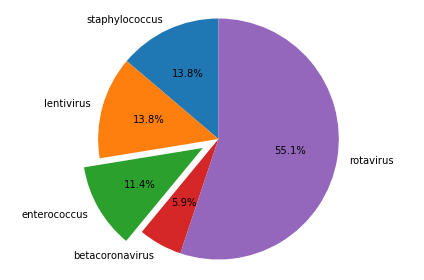

In [27]:
genes_all.show_facets(name = 'genera',topN=5)

**Retrieve Additional Gene Data (e.g. Sequence) from OMXWare as Object**

In [28]:
gene_list = genes_virus.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(genes.type(), genes.total_results()) )
    
gene = gene_list[0]
print("Id  \t\t=> " + gene.id())
print("Name   \t\t=> " + gene.name())
print("Sequence   \t=> " + gene.sequence()[:100] + "...")
print("Sequence length => " + str(gene.sequence_length()))

print("\n\n JSON:")
print(gene.json())



Returns: List of gene objects 
Results: 1

Id  		=> a6502bdee522336906f0a9a2a78de120
Name   		=> Spike glycoprotein
Sequence   	=> ATGAAGTCTTTAAATTACTTCTGGTTGTTCTTACCAGTACTTTCAACACTCAGCCTACCACAAGATGTCACTAGGTGCCAGTCCACTATTAACTTCAGGC...
Sequence length => 4152


 JSON:
{'id': 'a6502bdee522336906f0a9a2a78de120', 'name': 'Spike glycoprotein', 'type': 'gene', 'genera': ['alphacoronavirus'], 'genomes': ['GCA_900197095.1'], 'sequence_length': 4152, 'omx_creation_ts': '2020-03-14T22:07:15.370Z', 'omx_modified_ts': '2020-03-14T22:07:15.370Z', 'classification': ['virus']}


**Search for Details About a Specific Protein from SARS-COV-2 genomes**

In [38]:
search_term = 'Replicase polyprotein 1a'
proteins = omx.proteins(protein_name=search_term,page_size=25,classification='virus',collection = ['sars-cov-2'])
#default classification is bacteria, so when searching for sars-cov-2 results, classification must be specified as 'virus' and specify collection as covid19

print('Total Results for %s: %d' % (search_term, proteins.total_results()))

Total Results for Replicase polyprotein 1a: 662


**Get results in a dataframe** to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb

In [39]:
proteins_df = proteins.results(type='df')
proteins_df.head()

,classification,collection,genomes,id,name,omx_creation_ts,omx_modified_ts,sequence_length,type
0,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",NaN,ff671118cc355c62a849cf8c79ed4087,Replicase polyprotein 1a,2020-03-23T19:04:12.715Z,2020-03-23T19:04:12.715Z,4405,protein
1,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",[EPI_ISL_403928],a6f7b4ca0c34a70ce13b7a64a97e4c91,Replicase polyprotein 1a,2020-03-15T16:56:26.427Z,2020-03-23T01:28:00.349Z,4405,protein
2,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",[EPI_ISL_414476],1599a0c9d18e2df3e61f49bb9da577b1,Replicase polyprotein 1a,2020-03-15T22:30:51.313Z,2020-03-15T22:30:51.313Z,4405,protein
3,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",NaN,d3885a42cda7caf22c307e43b2dbe8a5,Replicase polyprotein 1a,2020-03-23T18:56:15.171Z,2020-03-23T18:56:15.171Z,4405,protein
4,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ...",NaN,3a0df461828ad3e956c1089ffa103db5,Replicase polyprotein 1a,2020-03-23T18:47:24.666Z,2020-03-23T18:47:24.666Z,4405,protein


**Retrieve Protein Data from OMXWare as Object**

In [31]:
protein_list = proteins.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(proteins.type(), proteins.total_results()) )
    
protein = protein_list[0]
print("Id  \t\t=> " + protein.id())
print("Name   \t\t=> " + protein.name())
print("Sequence   \t=> " + protein.sequence()[:100] + "...")
print("Sequence length => " + str(protein.sequence_length()))

print("\n\n JSON:")
print(protein.json())

Returns: List of protein objects 
Results: 662

Id  		=> ff671118cc355c62a849cf8c79ed4087
Name   		=> Replicase polyprotein 1a
Sequence   	=> MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRS...
Sequence length => 4405


 JSON:
{'id': 'ff671118cc355c62a849cf8c79ed4087', 'name': 'Replicase polyprotein 1a', 'type': 'protein', 'sequence_length': 4405, 'omx_creation_ts': '2020-03-23T19:04:12.715Z', 'omx_modified_ts': '2020-03-23T19:04:12.715Z', 'classification': ['virus'], 'collection': ['sars cov 2', 'sars-cov-2', 'sars cov2', 'covid-19', 'covid19', 'covid 19', 'coronavirus', 'corona virus']}


**Get IPR codes for Protein**

In [32]:
protein_ipr = protein.ipr()
print("Total IPR codes on protein %s are: %d" % (protein.id(),protein_ipr.total_results()))
protein_ipr_list = protein_ipr.results(type='list')
list_ipr_codes = []
for each_ipr in protein_ipr_list:
    list_ipr_codes.append(each_ipr.id())
print("IPR Codes on Protein:",list_ipr_codes)

Total IPR codes on protein ff671118cc355c62a849cf8c79ed4087 are: 29
IPR Codes on Protein: ['IPR008740', 'IPR014827', 'IPR014828', 'IPR014829', 'IPR032592', 'IPR024375', 'IPR021590', 'IPR002589', 'IPR009003', 'IPR038030', 'IPR022733', 'IPR038083', 'IPR038166', 'IPR037230', 'IPR038400', 'IPR032505', 'IPR036333', 'IPR038123', 'IPR037204', 'IPR036499', 'IPR018995']


**Get Domains for Protein**

In [33]:
protein_domains = protein.domains()
print("Total Domains on protein %s are: %d" % (protein.id(),protein_domains.total_results()))
protein_domains_list = protein_domains.results(type='list')
list_domains_uid = []
for each_domain in protein_domains_list:
    list_domains_uid.append(each_domain.id())
print("Domains on Protein:",list_domains_uid)

Total Domains on protein ff671118cc355c62a849cf8c79ed4087 are: 42
Domains on Protein: ['e2cad2b1388b005f1645c543c929d757', '89689ff07b3ed97338e9f0cc8c079aef', '203d3dfb51d7d9ea9bbb9e67af2a0abb', '028ab10bc2de9122272f202f21002779', '92ebecdcff1a59d6123f4e3133264695', '58b950fd36ce3d9751f1b9bb249bff7c', '1190692a318ed72059f48624fa681f1c', 'fdae11c8e0de45d7b902ef4d281da05c', '55a42297245680283d709b3b50b347cb', '4e388f266a5b8ec97bc6749a73cc74e7', '63eaad285de785e7ae13166e035cdd3f', 'd927f1784cbe71c25d9396f623d011ad', 'cfd5e1f3bff88a36cc1dc226f44b9704', '13e8f292b899ebc27bf4162c72194b91', 'a32587e00f1592c02c2f1f43e7095dcd', '2dab89f0d20a6a1df5ae39d903cdf193', '813fa1a4f8aaec81cc7835f53617f8ac', '307ed469bf72158795d153fbbdd4fe89', 'fec9ff0d891018f08b526b8c9a9180d1', '5b5749ab5d2158a34e560fa23988cfd2', 'b6aad2643a081264420278d3946455bd', '31649590255eb25618a989941edecd7f', 'c74fca287480e44f9b80c5a165f16646', 'dc25381610e21ff38e6433078516a6d6', 'd4556125ba41c9d85dfa05f2861c55d1', '99abc04e476c